# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a12136626099cd516ec9ca08005ec3bc&units=imperial&q='

In [14]:
# Checking
example_city = "butaritari"
example_response = requests.get(query_url + example_city).json()
print(json.dumps(example_response, indent=10))

{
          "coord": {
                    "lon": 172.7902,
                    "lat": 3.0707
          },
          "weather": [
                    {
                              "id": 801,
                              "main": "Clouds",
                              "description": "few clouds",
                              "icon": "02d"
                    }
          ],
          "base": "stations",
          "main": {
                    "temp": 83.01,
                    "feels_like": 88.14,
                    "temp_min": 83.01,
                    "temp_max": 83.01,
                    "pressure": 1012,
                    "humidity": 69,
                    "sea_level": 1012,
                    "grnd_level": 1011
          },
          "visibility": 10000,
          "wind": {
                    "speed": 9.75,
                    "deg": 138,
                    "gust": 9.86
          },
          "clouds": {
                    "all": 17
          },
          "dt": 1627849

In [19]:
# Loop through the list of cities and perform a request for data on each

# We create the empty lists that will contain the values from which we will create the dataframe
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

first_val = 0
set_value = 1


print("Beginning Data Retrieval\n-------------------------")

for city in cities:
    city_query = query_url + city
    query_response = requests.get(city_query)
    response = query_response.json()
    try:
        first_val += 1
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"Processing Record {first_val} of Set {set_value}| {city}")
        
    except:
        
        print("City not found. Skipping...")
        pass
    
    if first_val == 50:
        set_value += 1
        first_val = 0 
        time.sleep(5)
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 2 of Set 0| chokurdakh
Processing Record 3 of Set 0| krasnyy yar
Processing Record 4 of Set 0| inuvik
Processing Record 5 of Set 0| vaini
Processing Record 6 of Set 0| roma
Processing Record 7 of Set 0| puerto ayora
Processing Record 8 of Set 0| punta arenas
Processing Record 9 of Set 0| musoma
Processing Record 10 of Set 0| georgetown
Processing Record 11 of Set 0| tasiilaq
Processing Record 12 of Set 0| dikson
Processing Record 13 of Set 0| shablykino
Processing Record 14 of Set 0| gigmoto
Processing Record 15 of Set 0| mwene-ditu
Processing Record 16 of Set 0| hasaki
Processing Record 17 of Set 0| rikitea
Processing Record 18 of Set 0| port blair
Processing Record 19 of Set 0| ossora
Processing Record 20 of Set 0| airai
Processing Record 21 of Set 0| college
City not found. Skipping...
Processing Record 23 of Set 0| hobart
Processing Record 24 of Set 0| north bend
Processing Record 25 of Set 0| souillac
Processing 

Processing Record 11 of Set 4| taguatinga
Processing Record 12 of Set 4| kuopio
Processing Record 13 of Set 4| flin flon
Processing Record 14 of Set 4| kortkeros
Processing Record 15 of Set 4| cockburn town
Processing Record 16 of Set 4| luderitz
Processing Record 17 of Set 4| norrtalje
Processing Record 18 of Set 4| pingliang
Processing Record 19 of Set 4| yeppoon
Processing Record 20 of Set 4| constitucion
Processing Record 21 of Set 4| east london
Processing Record 22 of Set 4| kaitangata
Processing Record 23 of Set 4| eyl
Processing Record 24 of Set 4| sao filipe
Processing Record 25 of Set 4| san patricio
Processing Record 26 of Set 4| lasa
Processing Record 27 of Set 4| kirakira
Processing Record 28 of Set 4| jacmel
Processing Record 29 of Set 4| arraial do cabo
Processing Record 30 of Set 4| komsomolskoye
Processing Record 31 of Set 4| conneaut
City not found. Skipping...
Processing Record 33 of Set 4| pisco
Processing Record 34 of Set 4| clovis
Processing Record 35 of Set 4| ko

Processing Record 20 of Set 8| ambilobe
Processing Record 21 of Set 8| hambantota
Processing Record 22 of Set 8| okhotsk
Processing Record 23 of Set 8| vao
Processing Record 24 of Set 8| bukavu
Processing Record 25 of Set 8| rundu
Processing Record 26 of Set 8| necochea
Processing Record 27 of Set 8| uhlove
City not found. Skipping...
Processing Record 29 of Set 8| winona
Processing Record 30 of Set 8| tayshet
Processing Record 31 of Set 8| plettenberg bay
Processing Record 32 of Set 8| luau
Processing Record 33 of Set 8| salalah
Processing Record 34 of Set 8| raton
Processing Record 35 of Set 8| muleba
Processing Record 36 of Set 8| atasu
Processing Record 37 of Set 8| lazaro cardenas
Processing Record 38 of Set 8| laguna
Processing Record 39 of Set 8| lampa
Processing Record 40 of Set 8| paramonga
Processing Record 41 of Set 8| tual
Processing Record 42 of Set 8| riverton
Processing Record 43 of Set 8| honiara
Processing Record 44 of Set 8| jiwani
City not found. Skipping...
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# we create the dataframe
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
})

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Chokurdakh,70.6333,147.9167,39.00,71,18,7.65,1627850165
1,Krasnyy Yar,46.5331,48.3456,76.93,55,17,5.12,1627850166
2,Inuvik,68.3499,-133.7218,85.06,29,40,10.36,1627850166
3,Vaini,-21.2000,-175.2000,71.76,83,20,21.85,1627849936
4,Rome,43.2128,-75.4557,66.06,93,75,0.00,1627850043


In [28]:
cities_df.to_csv("Output/cities_df.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,21.756466,18.073205,68.963711,70.419295,52.150278,7.810260,1.627850e+09
std,33.686116,90.203306,13.784294,21.431105,38.976373,5.430699,2.581664e+02
min,-54.800000,-175.200000,33.150000,10.000000,0.000000,0.000000,1.627850e+09
25%,-5.553550,-64.350450,58.575000,59.000000,11.000000,3.880000,1.627850e+09
50%,27.850000,25.570100,70.250000,75.000000,51.000000,6.330000,1.627850e+09
75%,50.575200,95.641650,78.530000,88.000000,92.000000,10.360000,1.627851e+09
max,78.218600,179.316700,107.110000,100.000000,100.000000,29.930000,1.627851e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.
filter_humidity = cities_pd[(cities_pd["Humidity"] > 100)].index

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_cities = cities_pd.drop(index=filter_humidity)
new_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Chokurdakh,70.6333,147.9167,39.00,71,18,7.65,1627850165
1,Krasnyy Yar,46.5331,48.3456,76.93,55,17,5.12,1627850166
2,Inuvik,68.3499,-133.7218,85.06,29,40,10.36,1627850166
3,Vaini,-21.2000,-175.2000,71.76,83,20,21.85,1627849936
4,Rome,43.2128,-75.4557,66.06,93,75,0.00,1627850043
...,...,...,...,...,...,...,...,...
534,Eišiškės,54.1667,25.0000,64.18,97,98,6.62,1627850784
535,Luleå,65.5842,22.1547,55.47,76,0,9.22,1627850784
536,Valparaíso,-33.0393,-71.6273,84.43,29,0,16.11,1627850529
537,Caramay,10.1815,119.2360,79.07,82,78,4.27,1627850785


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

R squared: 0.0003489111396232737


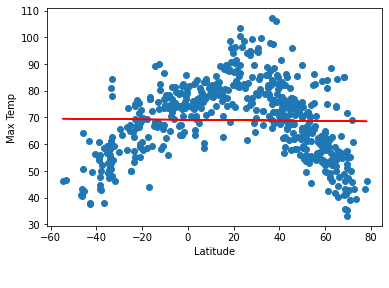

In [38]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = new_cities['Lat'].astype('float')
y_values = new_cities['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

R squared: 0.003698012623211857


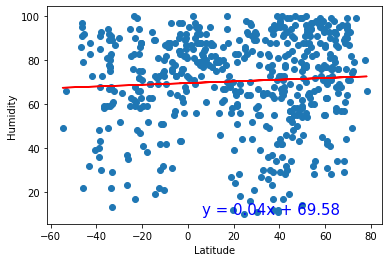

In [39]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = new_cities['Lat'].astype('float')
y_values = new_cities['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

R squared: 0.029042064040107906


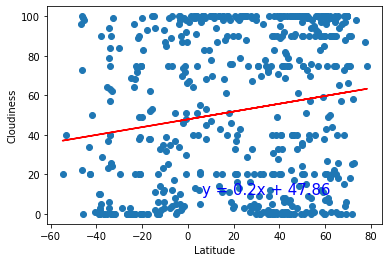

In [40]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = new_cities['Lat'].astype('float')
y_values = new_cities['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

R squared: 0.016513547895976505


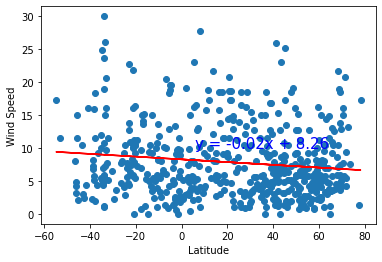

In [41]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = new_cities['Lat'].astype('float')
y_values = new_cities['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## Linear Regression

In [42]:
# The nother and souther hemispheres are divided by the Equator, that is at latitude = 0
# So in order to divide our dataframe, we must use lock using 0 as the filter

north = new_cities.loc[new_cities["Lat"] > 0]
south = new_cities.loc[new_cities["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3999331429476298


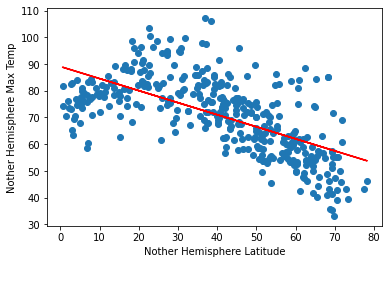

In [43]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = north['Lat'].astype('float')
y_values = north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Nothern Hemisphere Latitude')
plt.ylabel('Nothern Hemisphere Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5570878323878999


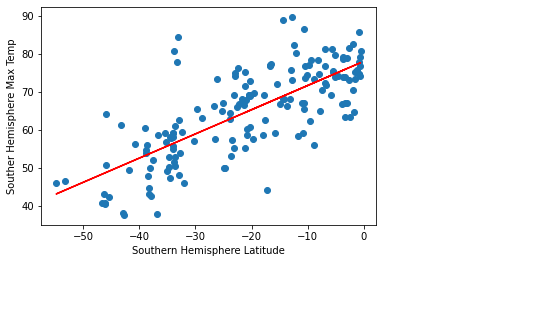

In [44]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = south['Lat'].astype('float')
y_values = south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Souther Hemisphere Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00012069647460164382


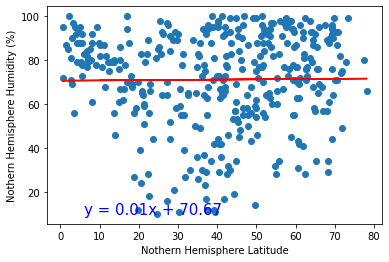

In [45]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = north['Lat'].astype('float')
y_values = north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Nothern Hemisphere Latitude')
plt.ylabel('Nothern Hemisphere Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.010883222517113645


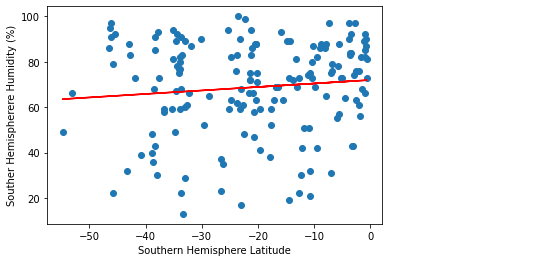

In [46]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = south['Lat'].astype('float')
y_values = south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Souther Hemispherere Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0015865450416357955


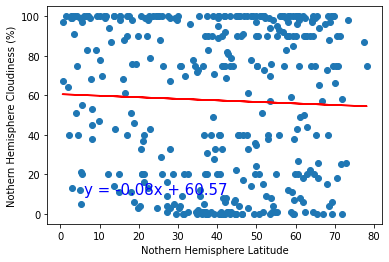

In [47]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = north['Lat'].astype('float')
y_values = north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Nothern Hemisphere Latitude')
plt.ylabel('Nothern Hemisphere Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = south['Lat'].astype('float')
y_values = south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Souther Hemisphere Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.013011530752246451


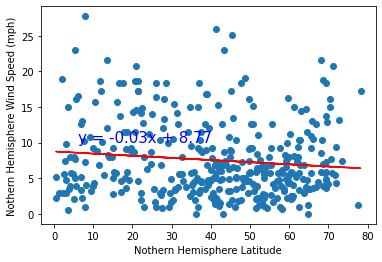

In [48]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = north['Lat'].astype('float')
y_values = north['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Nothern Hemisphere Latitude')
plt.ylabel('Nothern Hemisphere Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Temperature as x and y values
x_values = south['Lat'].astype('float')
y_values = south['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Souther Hemisphere Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()